# Overview
Loan default prediction is a common problem in the financial industry, as it can help lenders or banks identify borrowers who are likely to default on their loans. This information can be further used to adjust loan terms/conditions, reserve additional funds to cover potential losses, or even deny/refuse loans to high-risk borrowers. In this Project, we will develop a machine learning-based solution to predict loan default.

In this Project, we will build a predictive model that identifies potential loan defaulters by analyzing various factors like income, credit history, loan amount, and demographic information.

We’re dealing with a supervised binary classification problem. The goal is to train the best machine learning model to maximize the predictive capability of deeply understanding the past customer’s profile minimizing the risk of future loan defaults.



# Setup

In [1]:
#load all libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Loading the data

The dataset we're going to use can be downloaded from [Kaggle](https://www.kaggle.com/datasets/qusaybtoush1990/machine-learning?resource=download). The dataset contains information about credit applicants. Banks, globally, use this kind of dataset and type of informative data to create models to help in deciding on who to accept/refuse for a loan.

After all the exploratory data analysis, cleansing and dealing with all the anomalies we might (will) find along the way, the patterns of a good/bad applicant will be exposed to be learned by machine learning models.

In [2]:
# Load dataset
df = pd.read_csv('lending_club_loan_dataset.csv')

# size of the dataset
df.shape



(20000, 15)

In [3]:
df.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [4]:
# Let's explore variables, their data types, and total non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

- As we can see, this dataset has 21 features, with a mix of categorical and numerical features. Some features such as home_ownership, dti, and last_major_derog_none contain NULL values.

# Exploratory Data Analysis
- Let’s explore summary statistics of the numerical features in the dataset. As you can see in the below figure, the mean annual income is 73K, the average dti is 16.58, and the average revol_util is 55%.

- Let’s explore the distribution of the target variable. In this dataset, 20% of the records belong to applications with loan defaults.

In [5]:
# Label ratio
df['bad_loan'].value_counts(normalize = True)


0    0.8
1    0.2
Name: bad_loan, dtype: float64

- Let’s explore the distribution of home ownership with respect to the target variable. There is no major difference or visible patterns in terms of loan defaults for home ownership features.

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

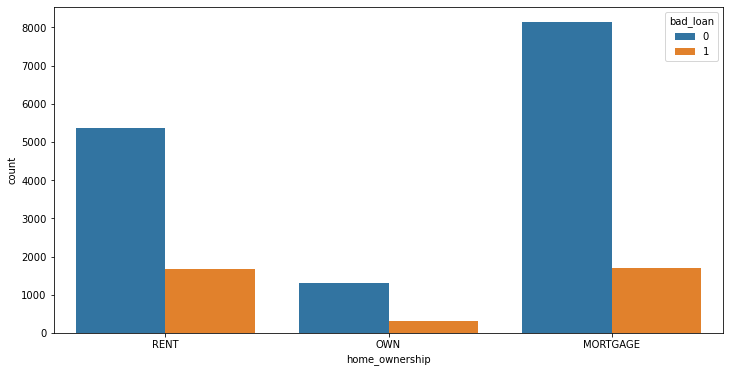

In [6]:
# Distribution of home_ownership based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'home_ownership', hue = 'bad_loan', data = df)


- Let’s explore the distribution of term duration with respect to the target variable. There is also no major difference in terms of loan defaults for the term, but there is a typo in the feature. You can see both categories - 36 months and 36 Months, both are the same.

<AxesSubplot:xlabel='term', ylabel='count'>

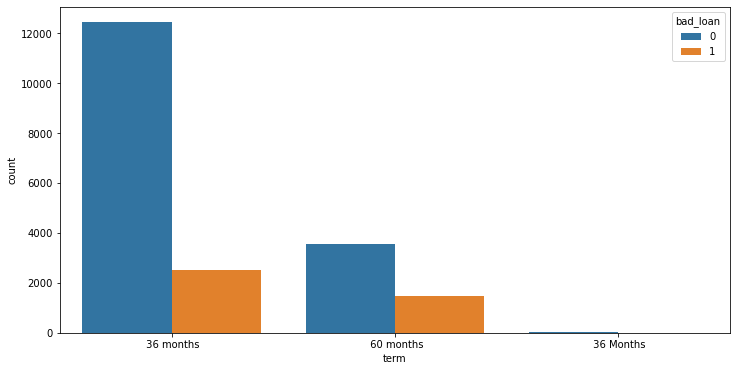

In [7]:
# Distribution of term based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'term', hue = 'bad_loan', data = df)


- Let’s explore the distribution of loan grade with respect to the target variable. As you can see in the figure below, as loan grade increases, the chances of default also increase. It means that the probability of loan defaults is higher in loan grades - D, E, F, G

<AxesSubplot:xlabel='grade', ylabel='count'>

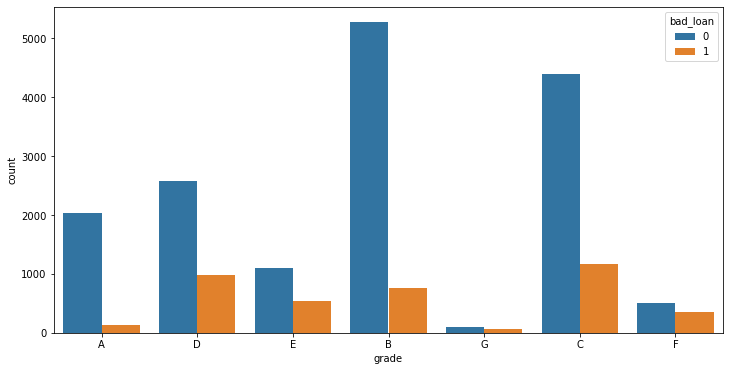

In [8]:
# Distribution of grade based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'grade', hue = 'bad_loan', data = df)


- Let’s explore the distribution of the purpose feature in the dataset. Based on it, the top 3 purposes for the loan are - debt consolidation, credit card, and home improvement.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'debt_consolidation'),
  Text(2, 0, 'medical'),
  Text(3, 0, 'other'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'small_business'),
  Text(6, 0, 'major_purchase'),
  Text(7, 0, 'vacation'),
  Text(8, 0, 'car'),
  Text(9, 0, 'house'),
  Text(10, 0, 'moving'),
  Text(11, 0, 'wedding')])

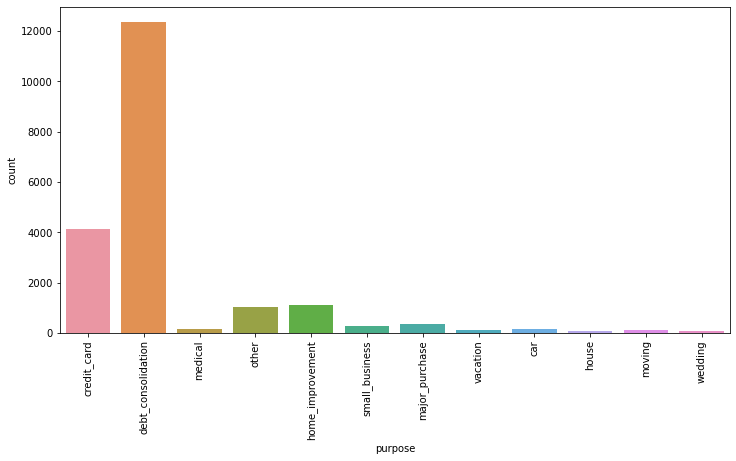

In [9]:
# Distribution of purpose 
plt.figure(figsize = (12,6))
sns.countplot(x = 'purpose', data = df)
plt.xticks(rotation = 90)


- Now, let’s explore distributions of numerical features, dti, and annual income, using box plots for each target label. As you can see below, people with low annual income and higher dti are likely to default on loans.

<AxesSubplot:xlabel='bad_loan', ylabel='annual_inc'>

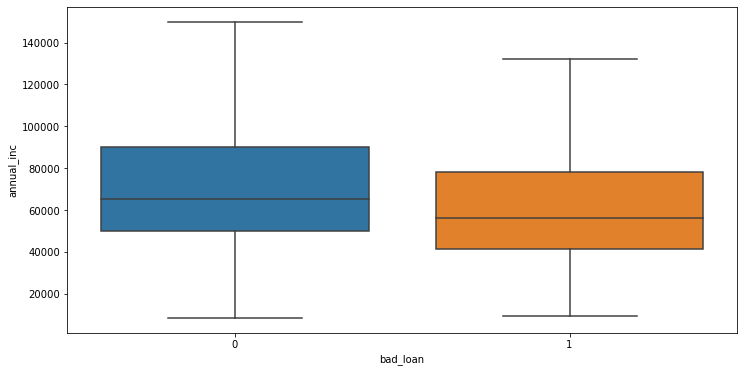

In [10]:
# Distribution of annual income based on churn status
plt.figure(figsize = (12,6))
sns.boxplot(x = 'bad_loan', y ='annual_inc', data = df, showfliers = False)


<AxesSubplot:xlabel='bad_loan', ylabel='dti'>

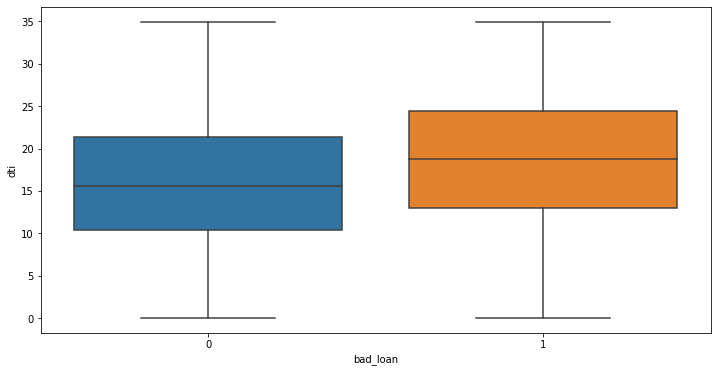

In [11]:
# Distribution of dti based on churn status
plt.figure(figsize = (12,6))
sns.boxplot(x = 'bad_loan', y ='dti', data = df, showfliers = False)


## Data Cleaning
- In this step, we will replace NULL values in home_ownership feature by mode and in dti by mean method. We will drop the last_major_derog_none column as it contains a lot of NULL values, and there is no appropriate method to impute missing values.
- We will also resolve the inconsistencies in the term feature.

In [12]:
# Impute NULL values in home ownership by mode
df['home_ownership'] = df['home_ownership'].fillna(df['home_ownership'].mode()[0])

# Impute NULL values in dti by mean
df['dti'] = df['dti'].fillna(df['dti'].mean())

# remove last_major_derog_none columns as it contains a lot of NULL values
df.drop(['last_major_derog_none'], axis = 1, inplace = True)

# remove inconsistencies in term feature
df['term'] = df['term'].apply(lambda i : i.lower())


## Data Preprocessing
- Before developing the ML models, let’s standardize numerical features in the dataset, and one hot encode categorical features. We will use the StandardScaler class provided by the sklearn library in Python. Further, we will split the input data into training and testing data with an 80:20 ratio.

In [13]:
# one hot encoding
cols_to_encode = ['grade', 'home_ownership', 'purpose', 'term']
df = pd.get_dummies(data = df, columns = cols_to_encode, drop_first = True)

# Standard Scaler
standard_scaler = StandardScaler()
feature_cols = ['annual_inc', 'emp_length_num', 'dti','revol_util', 'total_rec_late_fee', 'od_ratio']
transformed_features = standard_scaler.fit_transform(df[feature_cols])

df[feature_cols] = transformed_features

# split data into train and test
feature_cols  = df.columns.tolist()
feature_cols = [i for i in feature_cols if i not in ['id', 'bad_loan']]
x_train, x_test, y_train, y_test = train_test_split(df[feature_cols], df['bad_loan'], test_size = 0.2, random_state = 1234)


## Developing the ML Models
- First, we will train a logistic regression model and evaluate its performance. In this project, we will use accuracy, precision, and recall scores to compare and evaluate the performance of the ML models.

In [14]:
logistic_regression_classifier = LogisticRegression(max_iter = 1000, solver = 'lbfgs', random_state = 1234, class_weight = 'balanced' )
logistic_regression_classifier.fit(x_train, y_train)

prediction_values_lr = logistic_regression_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_lr, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_lr))


              precision    recall  f1-score   support

           0       0.88      0.63      0.73      3181
           1       0.32      0.66      0.43       819

    accuracy                           0.64      4000
   macro avg       0.60      0.65      0.58      4000
weighted avg       0.76      0.64      0.67      4000

[[2003 1178]
 [ 275  544]]


- As we can see in the above figure the accuracy is only 64%. The precision and recall for the positive class are 32% and 66%, respectively. Let’s build a K nearest neighbor classifier next and check whether we get any improvement in accuracy, precision, and recall score or not.

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors = 100)
knn_classifier.fit(x_train, y_train)

prediction_values_knn = knn_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_knn, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_knn))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3181
           1       0.72      0.04      0.07       819

    accuracy                           0.80      4000
   macro avg       0.76      0.52      0.48      4000
weighted avg       0.79      0.80      0.72      4000

[[3170   11]
 [ 790   29]]


- As we can see in the above figure, with KNN, accuracy, and precision improved to 80% and 72%, respectively, but recall reduced to only 4%. Let’s build an SVM classifier and check whether we get any further improvement.

In [16]:
svm_classifier = SVC(random_state = 1234, class_weight = 'balanced', probability = True, verbose = True)
svm_classifier.fit(x_train, y_train)

prediction_values_svm = svm_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_svm, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_svm))


[LibSVM]              precision    recall  f1-score   support

           0       0.88      0.64      0.74      3181
           1       0.32      0.66      0.43       819

    accuracy                           0.64      4000
   macro avg       0.60      0.65      0.59      4000
weighted avg       0.76      0.64      0.68      4000

[[2040 1141]
 [ 281  538]]


- SVM performance is similar to logistic regression. Its accuracy, precision, and recall values are almost the same as logistic regression. Let’s build a decision tree classifier in the next step.

In [17]:
decision_tree_classifier = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
decision_tree_classifier.fit(x_train, y_train)

prediction_values_dt = decision_tree_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_dt, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_dt))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3181
           1       0.74      0.03      0.06       819

    accuracy                           0.80      4000
   macro avg       0.77      0.51      0.47      4000
weighted avg       0.79      0.80      0.72      4000

[[3172    9]
 [ 794   25]]


- Decision tree classifier performance is the same as the KNN classifier. It has high precision but very poor recall. Let’s check whether the Random Forest classifier shows any improvement or not.

In [20]:
# Initialize Random Forest Model
random_forest = RandomForestClassifier(n_estimators = 1000, max_depth = 3, random_state = 1234)
random_forest.fit(x_train, y_train)

prediction_values_rf = random_forest.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_rf, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_rf))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3181
           1       1.00      0.00      0.01       819

    accuracy                           0.80      4000
   macro avg       0.90      0.50      0.45      4000
weighted avg       0.84      0.80      0.71      4000

[[3181    0]
 [ 816    3]]


- Random forest is also performing very poorly in predicting loan defaults. Let’s explore the XGBoost classifier in the next step.

In [19]:
# Initialize XGBoost Model
xgboost_classifier = XGBClassifier(n_estimators = 5000, max_depth = 4, random_state = 1234, learning_rate = 0.3)
xgboost_classifier.fit(x_train, y_train)

# Predict label for the test data and print classification report and confusion matrix
prediction_values_xgboost = xgboost_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_xgboost, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_xgboost))


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3181
           1       0.37      0.20      0.26       819

    accuracy                           0.76      4000
   macro avg       0.59      0.56      0.56      4000
weighted avg       0.72      0.76      0.74      4000

[[2893  288]
 [ 653  166]]


- As you can see, XGBoost has good accuracy and precision, but its recall is very poor compared with SVM and Logistic Regression models. Thus, we can conclude that for this problem, SVM and Logistic Regression models work best.

## Conclusion
- We examined the loan default dataset by applying various statistical and visualization techniques.
- We trained and developed six ML models. We also concluded that for this problem, SVM and Logistic Regression models work best.